<a href="https://colab.research.google.com/github/Haya146/ML-tutorials/blob/main/Simple_Linear_Regression_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

## Reading data

In [44]:
df = pd.read_csv("/content/canada_pci.csv")
df.head()

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [45]:
df.shape

(47, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   pci     47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [47]:
df.duplicated().sum()

0

## Assign feature column to x and taget column to y

In [48]:
# df-> arr
x= df['year'].values  # Features
y= df['pci'].values   # Target
print(x)
print(y)
print(x.shape)
print(y.shape)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016]
[ 3399.299037  3768.297935  4251.175484  4804.463248  5576.514583
  5998.144346  7062.131392  7100.12617   7247.967035  7602.912681
  8355.96812   9434.390652  9619.438377 10416.53659  10790.32872
 11018.95585  11482.89153  12974.80662  15080.28345  16426.72548
 16838.6732   17266.09769  16412.08309  15875.58673  15755.82027
 16369.31725  16699.82668  17310.75775  16622.67187  17581.02414
 18987.38241  18601.39724  19232.17556  22739.42628  25719.14715
 29198.05569  32738.2629   36144.48122  37446.48609  32755.17682
 38420.52289  42334.71121  42665.25597  42676.46837  41039.8936
 35175.18898  34229.19363 ]
(47,)
(47,)


## Visualization to understand data

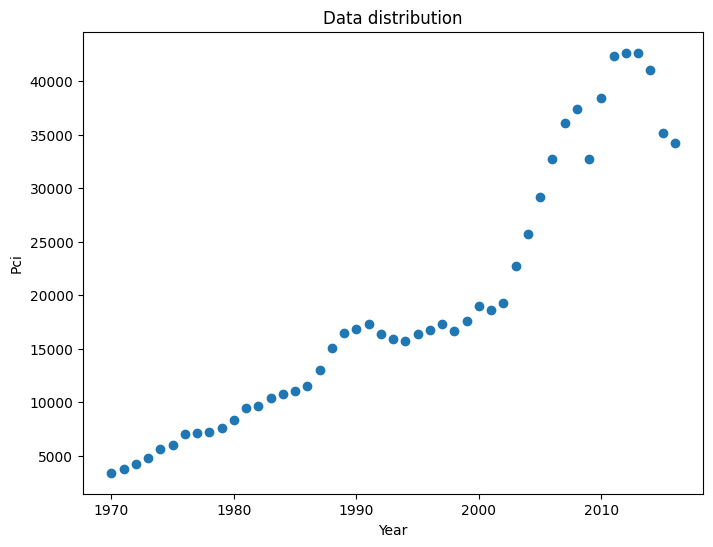

In [49]:
plt.figure(figsize=(8,6))
plt.title("Data distribution")
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Pci')
plt.show()

In [50]:
np.corrcoef(x,y)

array([[1.        , 0.94388395],
       [0.94388395, 1.        ]])

## Train Test split

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.8, test_size= 0.2)

In [52]:
# check the shape of train and test sample
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37,), (10,), (37,), (10,))

## select model

In [53]:
model = LinearRegression()

## Train or fit model


In [54]:
x_train = x_train.reshape(-1, 1)  # Reshape x_train to a 2D array with one column
x_test = x_train.reshape(-1, 1)  # Reshape x_test to a 2D array with one column
y_train = y_train.reshape(-1, 1)  # Reshape y_train to a 2D array with one column
y_test = y_train.reshape(-1, 1)  # Reshape y_test to a 2D array with one column

In [55]:
model.fit(x_train,y_train)

LinearRegression()

y= a + b x  
- y is the dependent variable  
- x is the independent variable  
- a is the intercept (the value of y
  when x is 0)  
- b is the coefficient (the slope of the line)  

In [56]:
model.intercept_

array([-1509748.6557468])

In [57]:
model.coef_

array([[766.69916382]])

## Predict model

In [58]:
y_pred= model.predict(x_test)
y_pred

array([[ 3715.49362444],
       [26716.4685389 ],
       [ 6782.2902797 ],
       [24416.37104745],
       [16749.3794093 ],
       [15982.68024549],
       [21349.57439219],
       [ 5248.89195207],
       [17516.07857312],
       [ 1415.396133  ],
       [22116.27355601],
       [27483.16770271],
       [31316.66352179],
       [18282.77773693],
       [13682.58275404],
       [19049.47690075],
       [ 9849.08693496],
       [29783.26519416],
       [  648.69696918],
       [15215.98108167],
       [20582.87522838],
       [ 2948.79446063],
       [ 2182.09529681],
       [12149.18442641],
       [25183.07021127],
       [ 9082.38777115],
       [ 4482.19278826],
       [10615.78609878],
       [22882.97271982],
       [11382.48526259],
       [23649.67188364],
       [19816.17606456],
       [28249.86686653],
       [34383.46017705],
       [12915.88359023],
       [35916.85850468],
       [29016.56603034]])

## Model Accuracy

**1. Mean Absolute Error (MAE)**

- **What it is**: MAE measures the average  
   absolute difference between the predicted values and the actual values. It's the average of the absolute errors.
     
- **Formula**: MAE = (1/n) * Σ|yᵢ - ŷᵢ| (where n is the number of data points, yᵢ is the actual value, and ŷᵢ is the predicted value)  
  
- **Interpretation**: MAE represents the average error magnitude in the same units as the target variable. For example, if you're predicting house prices in dollars, an MAE of 5000 means your predictions are on average off by $5000.
  
- **Pros**: Easy to understand and interpret; less sensitive to outliers than MSE.
  
- **Cons**: Doesn't heavily penalize large errors, which might be important in some cases.

In [59]:
mean_absolute_error(y_test,y_pred)

2831.0439442005695

**2. Mean Absolute Percentage Error (MAPE)**

- **What it is**: MAPE expresses the average absolute error as a percentage of the actual values.
     
- **Formula**:  MAPE = (1/n) * Σ(|yᵢ - ŷᵢ| / |yᵢ|) * 100%
  
- **Interpretation**: It gives you an idea of the average percentage error in your predictions. For example, a MAPE of 10% means your predictions are on average off by 10% of the actual values.
  
- **Pros**: Easy to understand and compare across different datasets due to the percentage scale.

  
- **Cons**: Can be problematic when actual values are close to zero (division by zero) or when there are large variations in the target variable.

In [60]:
mean_absolute_percentage_error(y_test,y_pred)

0.2006050059515078

**3. Mean Squared Error (MSE)**

- **What it is**: MSE measures the average squared difference between the predicted values and the actual values.
     
- **Formula**:   MSE = (1/n) * Σ(yᵢ - ŷᵢ)²
  
- **Interpretation**: It gives more weight to larger errors due to the squaring. A lower MSE indicates better model performance.
  
- **Pros**: More sensitive to larger errors, which can be desirable in some cases; has nice mathematical properties for optimization.

  
- **Cons**: Can be heavily influenced by outliers; the units are squared, making it less directly interpretable than MAE.

In [61]:
mean_squared_error(y_test,y_pred)

12934553.540510168

**4. R-squared (R²)**

- **What it is**: R-squared, also known as the coefficient of determination, measures the proportion of variance in the target variable that is explained by the model.
     
- **Formula**:    R² = 1 - (SSres / SStot)  
Where SSres is the sum of squared residuals (the difference between actual and predicted values) and SStot is the total sum of squares (the difference between actual values and their mean).
  
- **Interpretation**: R² ranges from 0 to 1. A higher R² indicates that the model explains more of the variance in the target variable, meaning a better fit.
 - R² = 0: The model does not explain any variance.
 - R² = 1: The model perfectly explains all variance.
  
- **Pros**: Provides a single, intuitive measure of model fit; widely used and understood.
  
- **Cons**: Can be misleading in some cases, especially when comparing models with different numbers of predictors or when dealing with non-linear relationships.

In [68]:
r2= r2_score(y_test,y_pred)
r2

0.8803311239075652

## Visualization

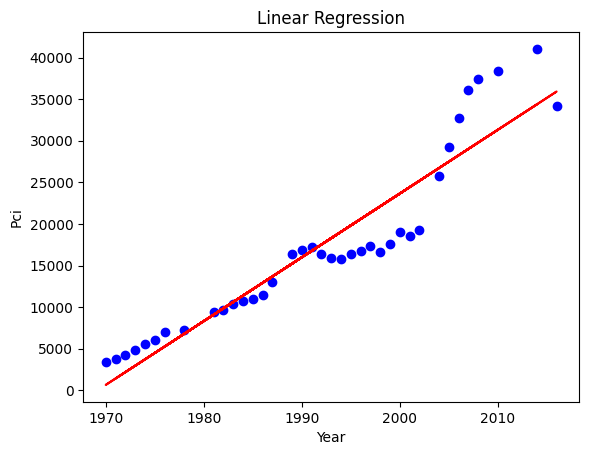

In [66]:
# plot the data and the regression model
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Pci')
plt.show()

In [67]:
print('R-squared:', r2)

R-squared: 0.8803311239075652
